In [1]:
import pandas as pd, numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def SMAPE(y_true, y_pred): 
    
    return np.mean(SMAPEu(y_true,y_pred)) 

In [6]:
def SMAPEu(y_true,y_pred):
    y_true = y_true.astype('float')
    y_pred = y_pred.astype('float')
    return (np.abs(y_true - y_pred)) /((y_true+y_pred)/2 +((y_pred==0.0)&(y_true==0.0)*1))

In [3]:
mat = pd.read_csv('train_transf_v3.csv')

In [7]:
SMAPE(mat['y'],mat['d0'].apply(lambda x: 1 if x==0 else x))

0.7227623786635924

In [8]:
serie1 = SMAPEu(mat['y'],mat['median'])
serie2 = np.log(0.0001+mat['y']/mat['d0'].apply(lambda x: 1 if x==0 else x))
#serie2 = np.log1p(np.abs(mat['y']-mat['median']))
#serie2 = np.max(np.vstack((mat['y'],mat['median'])).T,axis=1)/(np.min(np.vstack((mat['y'],mat['median'])).T,axis=1)+1)
serie1, serie2 = shuffle(serie1,serie2)

offset = int(serie1.shape[0] * 0.1)
serie1_cut, serie2_cut = serie1[:offset], serie2[:offset]
matAn = pd.DataFrame(np.vstack((serie1_cut,serie2_cut)).T,columns=['smape','div'])

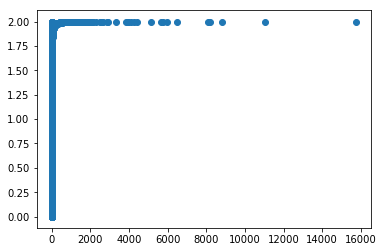

In [15]:
fig = plt.figure()
plt.scatter(x=serie2_cut,y=serie1_cut)
plt.show()

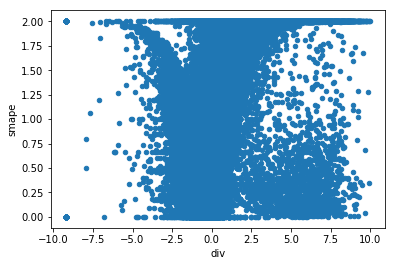

In [9]:
matAn[matAn['div']<10].plot.scatter(x='div',y='smape')
plt.show()

In [47]:
np.max(serie1)

1.9999966509764915

In [102]:
test1 = np.array([0,0,1,1,10,10,100,100,1000,1000])
pred1 = np.array([0,1,0,1000,0,0,10,1000,0,1000])

In [117]:
np.vstack((SMAPEu(test1,pred1),test1,pred1)).T

array([[    0.        ,     0.        ,     0.        ],
       [    2.        ,     0.        ,     1.        ],
       [    2.        ,     1.        ,     0.        ],
       [    1.996004  ,     1.        ,  1000.        ],
       [    2.        ,    10.        ,     0.        ],
       [    2.        ,    10.        ,     0.        ],
       [    1.63636364,   100.        ,    10.        ],
       [    1.63636364,   100.        ,  1000.        ],
       [    2.        ,  1000.        ,     0.        ],
       [    0.        ,  1000.        ,  1000.        ]])

In [124]:
np.max(np.vstack((mat['y'],mat['median'])).T,axis=1).map(lambda x: 0 if x==0 else 1)

AttributeError: 'numpy.ndarray' object has no attribute 'map'